<a href="https://colab.research.google.com/github/shimyoubin/2025-1-myclass-BDA/blob/main/inclass/13w_B_wed_0604_easy_ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 10 텍스트 마이닝

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 5.71 MiB | 5.41 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [4]:
!pip show konppy

In [5]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 33.4 MB/s eta 0:00:00


In [6]:
! pip show Koreanize-metplotlib

In [7]:
!pip install Koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.3 MB/s eta 0:00:00


In [8]:
import koreanize_matplotlib

In [9]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


## 다음 명령어는 Ubuntu 및 Debian 계열의 리눅스 배포한에서 나눔 폰트 패키지를 설치하는데 사용
 - qpt-get

In [10]:
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

In [69]:
!find / -name NanumGothic.ttf

find: ‘/proc/71/task/71/net’: Invalid argument
find: ‘/proc/71/net’: Invalid argument
/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [70]:
FONT_PATH = "NanumGothic.ttf"

In [15]:
f =open("data/speech_moon.txt",encoding='utf-8')
moon = f.read()
f.close()

In [16]:
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

In [17]:
import re # 정규 표현식으로 불필요한 문자 제거하기, 모든 한글문자 가~힣을 뺀 나머지

moon = re.sub('[^가-힣]',' ',moon) # 가 ~ 힣 빼고는 공백을 넣어라                   중요하답니다.!~!!!!!!!!!!!!!!!!!!!!!!!

In [18]:
moon

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

In [19]:
from konlpy.tag import Hannanum # 명사만 남기기
han = Hannanum()
han.nouns(u'대한민국의 영토는 한반도와 그 부속도서로 한다.')

['대한민국', '영토', '한반도', '부속도서']

In [20]:
nouns = han.nouns(moon)
type(nouns)

list

In [21]:
len(nouns)

1413

In [22]:
nouns[:10]

['정권교체', '정치교체', '시대교체', '불비불명', '고사', '남쪽', '언덕', '나뭇가지', '년', '동안']

In [23]:
nouns[-10:]

['마음', '길', '우리나라', '대통령', '우리', '모두', '주인', '진정한', '우리나라', '대통령']

In [24]:
import pandas as pd

df_word = pd.DataFrame({'word':nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [25]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1413 non-null   object
dtypes: object(1)
memory usage: 11.2+ KB


In [26]:
df_word['word'].value_counts()

,count
word,
저,22
일자리,19
나라,19
국민,18
우리,17
...,...
병행,1
손,1
담쟁이,1


In [27]:
df_word[df_word.word == '대통령']

,word
39,대통령
44,대통령
46,대통령
65,대통령
268,대통령
1051,대통령
1053,대통령
1071,대통령
1205,대통령
1347,대통령


In [28]:
df_word['len'] = df_word['word'].str.len()
df_word.head()

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2


In [29]:
df_word[df_word.len >= 2]

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [30]:
df_word.query('len >= 2') # 위에랑 같음

,word,len
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [31]:
df = df_word.query('len >= 2')
df.sort_values(by='len')

,word,len
1402,국민,2
1401,나라,2
1399,권력,2
1398,겸손,2
1395,세상,2
...,...,...
1143,기초노령연금,6
1268,군사대결지대,6
173,성적스트레스,6
1055,국가일자리위원회,8


In [32]:
df[df.word == '대통령']

,word,len
39,대통령,3
44,대통령,3
46,대통령,3
65,대통령,3
268,대통령,3
1051,대통령,3
1053,대통령,3
1071,대통령,3
1205,대통령,3
1347,대통령,3


In [33]:
df_freq = df.groupby('word', as_index=False) \
              .agg(n = ('word', 'count')) \
              .sort_values('n',ascending=False)
df_freq

,word,n
462,일자리,19
153,나라,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
324,석유시대,1
322,서민경제,1
321,서로,1
320,생활임금,1


In [34]:
df_freq [df_freq.word =='대통령']

,word,n
198,대통령,12


In [35]:
top20 = df_freq.head(20)
top20

,word,n
462,일자리,19
153,나라,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
423,우리나라,10
525,정치,10
304,사회,9


In [36]:
%config inlineBackend.figure_format = 'retina'

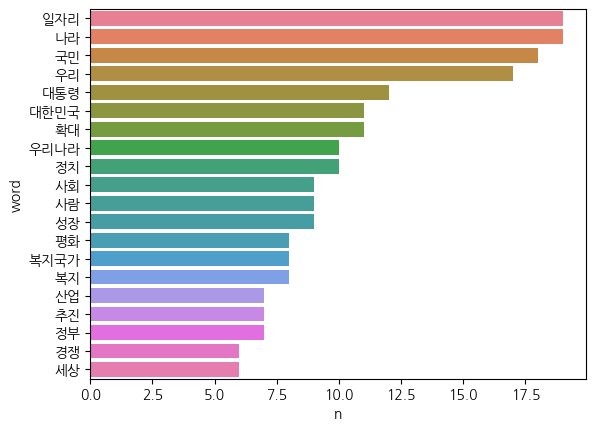

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(top20, y='word', x='n', hue='word');

In [38]:
df_freq.head()

,word,n
462,일자리,19
153,나라,19
116,국민,18
422,우리,17
198,대통령,12


In [39]:
df_freq.set_index('word') # 워드로 인덱스로 바꿈 반형은 안돼고 출력만

,n
word,
일자리,19
나라,19
국민,18
우리,17
대통령,12
...,...
석유시대,1
서민경제,1
서로,1


In [40]:
mydf = pd.DataFrame({'col1':[1,2], 'col2':[0.5, 0.75]},
                    index = ['row1', 'row2'])

In [41]:
mydf

,col1,col2
row1,1,0.50
row2,2,0.75


In [42]:
mydf.to_dict() # 딕셔너리로 바꿈

{'col1': {'row1': 1, 'row2': 2}, 'col2': {'row1': 0.5, 'row2': 0.75}}

In [43]:
df_freq.set_index('word').to_dict()

{'n': {'일자리': 19,
  '나라': 19,
  '국민': 18,
  '우리': 17,
  '대통령': 12,
  '대한민국': 11,
  '확대': 11,
  '우리나라': 10,
  '정치': 10,
  '사회': 9,
  '사람': 9,
  '성장': 9,
  '평화': 8,
  '복지국가': 8,
  '복지': 8,
  '산업': 7,
  '추진': 7,
  '정부': 7,
  '경쟁': 6,
  '세상': 6,
  '교육': 6,
  '보통사람들': 5,
  '상생': 5,
  '정규직': 5,
  '경제': 5,
  '대통령의': 5,
  '공평': 5,
  '때문': 4,
  '모델': 4,
  '희망': 4,
  '강화': 4,
  '기회': 4,
  '고통': 4,
  '아래': 4,
  '사회적': 4,
  '투자': 4,
  '창출': 4,
  '중소기업': 4,
  '전환': 4,
  '정의': 4,
  '주인': 4,
  '담쟁': 4,
  '아이들': 4,
  '요구': 4,
  '여성': 4,
  '약자': 4,
  '역사': 4,
  '결과': 4,
  '개선': 3,
  '특권': 3,
  '활용': 3,
  '경제성장': 3,
  '질서': 3,
  '지방': 3,
  '행복': 3,
  '채택': 3,
  '지원': 3,
  '이명박': 3,
  '사람들': 3,
  '공정': 3,
  '비중': 3,
  '세금': 3,
  '세계': 3,
  '성장전략': 3,
  '소수': 3,
  '양극화': 3,
  '원칙': 3,
  '원전': 3,
  '여러분': 3,
  '에너지': 3,
  '시민': 3,
  '신산업': 3,
  '변화': 3,
  '군대': 3,
  '노인': 3,
  '과도한': 3,
  '관계': 3,
  '부담': 3,
  '문재인': 3,
  '교육혁신': 3,
  '권력': 3,
  '국민들': 3,
  '국가': 3,
  '그것': 3,
  '가지': 3,
  '혁명': 3,
  '혁신':

In [44]:
df_freq.set_index('word').to_dict()['n']

{'일자리': 19,
 '나라': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '우리나라': 10,
 '정치': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '추진': 7,
 '정부': 7,
 '경쟁': 6,
 '세상': 6,
 '교육': 6,
 '보통사람들': 5,
 '상생': 5,
 '정규직': 5,
 '경제': 5,
 '대통령의': 5,
 '공평': 5,
 '때문': 4,
 '모델': 4,
 '희망': 4,
 '강화': 4,
 '기회': 4,
 '고통': 4,
 '아래': 4,
 '사회적': 4,
 '투자': 4,
 '창출': 4,
 '중소기업': 4,
 '전환': 4,
 '정의': 4,
 '주인': 4,
 '담쟁': 4,
 '아이들': 4,
 '요구': 4,
 '여성': 4,
 '약자': 4,
 '역사': 4,
 '결과': 4,
 '개선': 3,
 '특권': 3,
 '활용': 3,
 '경제성장': 3,
 '질서': 3,
 '지방': 3,
 '행복': 3,
 '채택': 3,
 '지원': 3,
 '이명박': 3,
 '사람들': 3,
 '공정': 3,
 '비중': 3,
 '세금': 3,
 '세계': 3,
 '성장전략': 3,
 '소수': 3,
 '양극화': 3,
 '원칙': 3,
 '원전': 3,
 '여러분': 3,
 '에너지': 3,
 '시민': 3,
 '신산업': 3,
 '변화': 3,
 '군대': 3,
 '노인': 3,
 '과도한': 3,
 '관계': 3,
 '부담': 3,
 '문재인': 3,
 '교육혁신': 3,
 '권력': 3,
 '국민들': 3,
 '국가': 3,
 '그것': 3,
 '가지': 3,
 '혁명': 3,
 '혁신': 3,
 '강자': 3,
 '가치': 3,
 '적극적': 2,
 '수명': 2,
 '토대': 2,
 '특권층': 2,
 '수준': 2,
 '과실': 2,
 '선순환'

In [45]:
dic_word = df_freq.set_index('word').to_dict()['n']
dic_word

{'일자리': 19,
 '나라': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '우리나라': 10,
 '정치': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '추진': 7,
 '정부': 7,
 '경쟁': 6,
 '세상': 6,
 '교육': 6,
 '보통사람들': 5,
 '상생': 5,
 '정규직': 5,
 '경제': 5,
 '대통령의': 5,
 '공평': 5,
 '때문': 4,
 '모델': 4,
 '희망': 4,
 '강화': 4,
 '기회': 4,
 '고통': 4,
 '아래': 4,
 '사회적': 4,
 '투자': 4,
 '창출': 4,
 '중소기업': 4,
 '전환': 4,
 '정의': 4,
 '주인': 4,
 '담쟁': 4,
 '아이들': 4,
 '요구': 4,
 '여성': 4,
 '약자': 4,
 '역사': 4,
 '결과': 4,
 '개선': 3,
 '특권': 3,
 '활용': 3,
 '경제성장': 3,
 '질서': 3,
 '지방': 3,
 '행복': 3,
 '채택': 3,
 '지원': 3,
 '이명박': 3,
 '사람들': 3,
 '공정': 3,
 '비중': 3,
 '세금': 3,
 '세계': 3,
 '성장전략': 3,
 '소수': 3,
 '양극화': 3,
 '원칙': 3,
 '원전': 3,
 '여러분': 3,
 '에너지': 3,
 '시민': 3,
 '신산업': 3,
 '변화': 3,
 '군대': 3,
 '노인': 3,
 '과도한': 3,
 '관계': 3,
 '부담': 3,
 '문재인': 3,
 '교육혁신': 3,
 '권력': 3,
 '국민들': 3,
 '국가': 3,
 '그것': 3,
 '가지': 3,
 '혁명': 3,
 '혁신': 3,
 '강자': 3,
 '가치': 3,
 '적극적': 2,
 '수명': 2,
 '토대': 2,
 '특권층': 2,
 '수준': 2,
 '과실': 2,
 '선순환'

In [46]:
dic_word['대한민국']

11

In [73]:
from wordcloud import WordCloud
wc = WordCloud(font_path=FONT_PATH, background_color='gray',
               random_state = 1234, width=600, height=300)
img_wc = wc.generate_from_frequencies(dic_word)


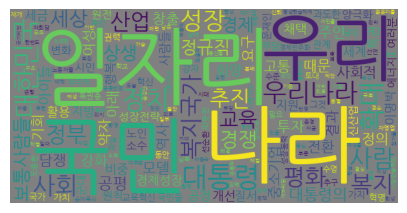

In [74]:
plt.figure(figsize=(5, 3))
plt.axis('off')
plt.imshow(img_wc);

## 13 주차 수업

In [75]:
from PIL import Image
icon = Image.open('data/cloud.png')

In [76]:
import numpy as np
img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)
img;

In [77]:
wc = WordCloud(font_path=FONT_PATH, background_color='white',
               random_state = 1234, width=400, height=400,
               mask = img)
img_wc = wc.generate_from_frequencies(dic_word)

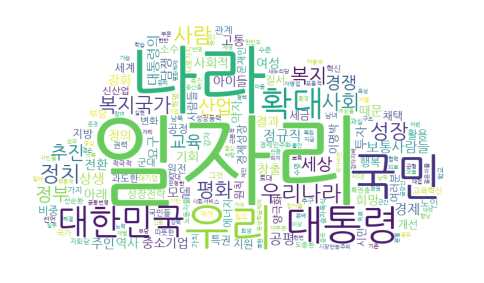

In [78]:
plt.figure(figsize=(6, 4))
plt.axis('off')
plt.imshow(img_wc);

In [79]:
wc = WordCloud(font_path=FONT_PATH, background_color='white',
               random_state = 1234, width=400, height=400,
               mask = img,
               colormap='plasma')
              #  colormap='inferno')
img_wc = wc.generate_from_frequencies(dic_word)

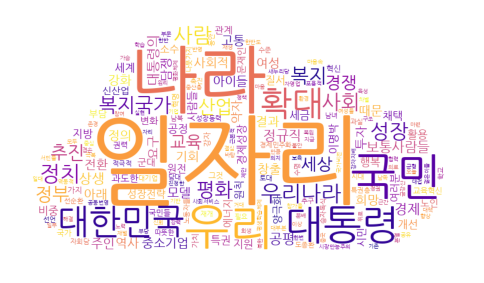

In [80]:
plt.figure(figsize=(6, 4))
plt.axis('off')
plt.imshow(img_wc);

## BTS

In [116]:
df = pd.read_csv('data/news_comment_BTS.csv', encoding='utf8')

In [117]:
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [118]:
df['reply'] = df['reply'].str.replace('[가-힣]', ' ',regex=True)
df['reply'].head()

,reply
0,<U+0001F49C>
1,
2,\n\n HOT 100\n\n1 [BTS]\n2 C...
3,ㅠㅠ !
4,"BTS, ^^ !!"


In [119]:
from konlpy.tag import Kkma
kkma =Kkma()
kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트레터링 남겨주세요')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트레', '링']

In [90]:
df2 = pd.DataFrame({'A' : [1,2,3],
                   'B' : [4,5,6]})
df2

,A,B
0,1,4
1,2,5
2,3,6


In [91]:
df_S = df2.apply(lambda x :x**2)
df_S

,A,B
0,1,16
1,4,25
2,9,36


In [92]:
func = lambda x :x**2             # --------------------------------------------
df_S = df2.apply(func)
df_S

,A,B
0,1,16
1,4,25
2,9,36


In [120]:
nouns = df['reply'].apply(kkma.nouns)                      #     -------------------------------------------------
nouns

,reply
0,"[0001, 49]"
1,[]
2,"[100, 1, 2, 3, 4, 5, 6, 7, 8, 9, 685, 10]"
3,[]
4,[]
...,...
1195,[]
1196,"[0001, 49]"
1197,[]
1198,[]


In [121]:
df3 = pd.DataFrame({'A' : [[0,1,2], 'foo',[], [3,4]],
                    'B' : 1,
                    'C' : [['a', 'b', 'c'], np.nan, [], ['d','e']]})
df3

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [99]:
df3.explode('A') # 집합 풀기 [] 는 NaN 값으로

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [101]:
df3.explode(['A', 'C'])  # 종합으로 나온데욥.. 집합이 3개 3개  해서 한행에 들어와서 뭐시기예 / 여러개 할때는 집합의 개수가 맞아야 가능함

,A,B,C
0,0,1,a
0,1,1,b
0,2,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [122]:
type(nouns)

pandas.core.series.Series

In [110]:
nouns[:5]

,reply
0,"[0001, 49]"
1,[]
2,"[100, 1, 2, 3, 4, 5, 6, 7, 8, 9, 685, 10]"
3,[]
4,[]


In [111]:
nouns = nouns.explode()
nouns

,reply
0,0001
0,49
1,NaN
2,100
2,1
...,...
1196,49
1197,NaN
1198,NaN
1199,0001


In [124]:
df_word = pd.DataFrame({'word':nouns})
df_word.head()

,word
0,"[0001, 49]"
1,[]
2,"[100, 1, 2, 3, 4, 5, 6, 7, 8, 9, 685, 10]"
3,[]
4,[]


In [125]:
df_word['len'] = df_word['word'].str.len()
df_word = df_word.query('len >= 2')
df_word.head()

,word,len
0,"[0001, 49]",2
2,"[100, 1, 2, 3, 4, 5, 6, 7, 8, 9, 685, 10]",12
19,"[0001, 49]",2
27,"[19, 1]",2
28,"[0001, 49, 98]",3


In [132]:
df_freq = df_word.groupby('word', as_index =False) \
    .agg(n = ('word', 'count')) \
    .sort_values('n', ascending = False)
df_freq

TypeError: unhashable type: 'list'

In [129]:
top20 = df_freq(20)
top20.head()

TypeError: 'DataFrame' object is not callable

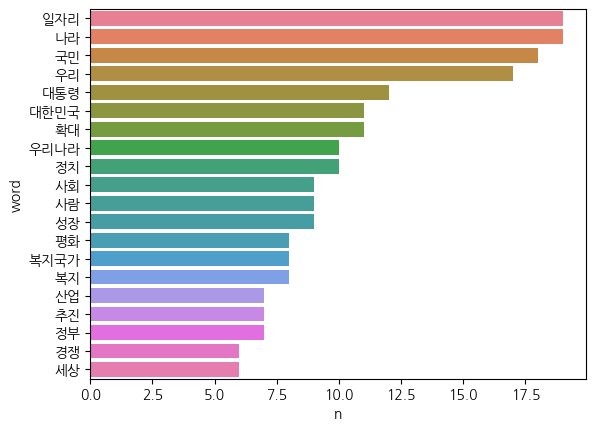

In [128]:
sns.barplot(top20, y='word', x='n', hue='word');

In [133]:
from PIL import Image

In [134]:
icon = Image.open('data/cloud.png')

In [135]:
img = Image.new("RGB", icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
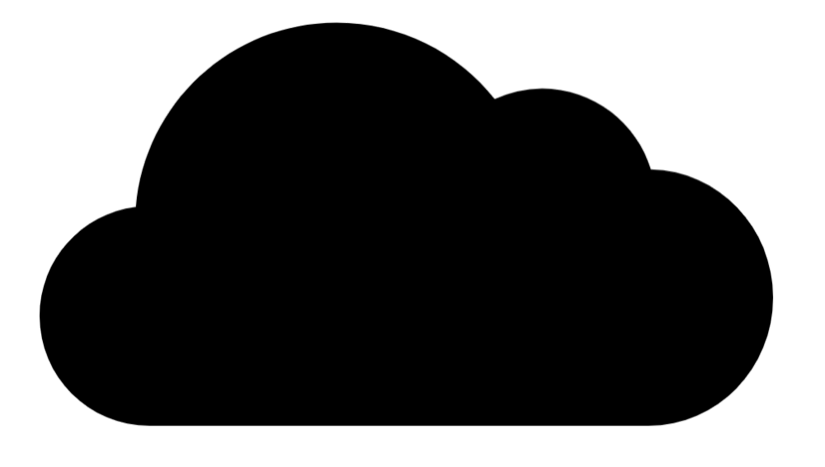

In [136]:
img

In [138]:
dic_word = df_freq.set_index('word').to_dict()['n']

In [139]:
dic_word

{'0001': 137,
 '49': 80,
 '100': 61,
 '44': 29,
 '389': 21,
 '60': 14,
 '973': 8,
 '62': 7,
 '57': 5,
 '11': 4,
 '38': 4,
 '2764': 4,
 '50': 4,
 '40': 4,
 '30': 4,
 '200': 4,
 '1000': 3,
 '10': 3,
 'ㄷㄷ': 3,
 '43': 3,
 '495': 3,
 '970': 3,
 '2010': 2,
 '90': 2,
 '642': 2,
 '2002': 2,
 '20': 2,
 '2020': 2,
 'ㄷㄷㄷ': 2,
 '97': 2,
 'ㅊㅋㅊㅋ': 2,
 '08': 1,
 '104': 1,
 '1001': 1,
 '1160': 1,
 '111': 1,
 '2763': 1,
 '21': 1,
 '203': 1,
 '25': 1,
 '24': 1,
 '18': 1,
 '499': 1,
 '497': 1,
 '496': 1,
 '493': 1,
 '386': 1,
 '382': 1,
 '387': 1,
 '1300489084222279680': 1,
 '19': 1,
 '14': 1,
 '15': 1,
 '647': 1,
 '64': 1,
 '601': 1,
 '631': 1,
 '600': 1,
 '929': 1,
 '927': 1,
 '923': 1,
 '77': 1,
 '685': 1,
 '70': 1,
 'ㄱㄱㄱ': 1,
 '98': 1,
 '99': 1,
 'ㄹㅇ': 1,
 'ㅅㅂ': 1,
 'ㅁㅊ': 1,
 'ㅇㅅ': 1,
 'ㅇㅈ': 1,
 'ㅉㅉ': 1,
 'ㅊㅋ': 1}

In [141]:
wc = WordCloud(font_path=FONT_PATH, background_color='white',
               random_state = 1234, width=400, height=400,
               mask = img,
               colormap='plasma')
              #  colormap='inferno')

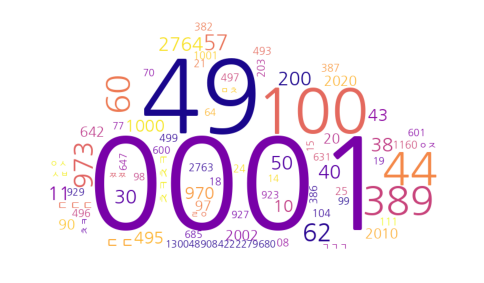

In [142]:
img_wc = wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(6, 4))
plt.axis('off')
plt.imshow(img_wc);

In [ ]:
# 웃기죠? 저도 웃겨요 ㅋㅋ

## 종료